# Fraud Detection

In [1]:
# Install a conda package in the current Jupyter kernel
import sys
!conda install --yes --prefix {sys.prefix} pandas

Solving environment: done

# All requested packages already installed.



In [2]:
# Import Pandas
import pandas as pd
# Import Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#Import Numpy
import numpy as np

In [3]:
# Read the file with transactions history
data = pd.read_excel('/Users/vero/Documents/Programming for Big Data/Assignments/ASSIGNMENT-4+5/CC-3Y-Transactions.xlsx', sheet_name= 'Credit-Card-Transactions')
data.head(5)

,City,Date,Card Type,Exp Type,Gender,Amount
0,"Delhi, India",2014-10-29,Gold,Bills,F,82475
1,"Greater Mumbai, India",2014-08-22,Platinum,Bills,F,32555
2,"Bengaluru, India",2014-08-27,Silver,Bills,F,101738
3,"Greater Mumbai, India",2014-04-12,Signature,Bills,F,123424
4,"Bengaluru, India",2015-05-05,Gold,Bills,F,171574


In [4]:
# Check the data shape
data.shape

(26052, 6)

In [5]:
# Check the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   City       26052 non-null  object        
 1   Date       26052 non-null  datetime64[ns]
 2   Card Type  26052 non-null  object        
 3   Exp Type   26052 non-null  object        
 4   Gender     26052 non-null  object        
 5   Amount     26052 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.2+ MB


In [6]:
# Check of data type
type_of_data = pd.DataFrame(data.dtypes, columns = ['Type'])
type_of_data.columns.name = 'Variable'
type_of_data

Variable,Type
City,object
Date,datetime64[ns]
Card Type,object
Exp Type,object
Gender,object
Amount,int64


In [7]:
# Check the data for "Amount"
data.describe()

,Amount
count,26052.000000
mean,156411.537425
std,103063.254287
min,1005.000000
25%,77120.250000
50%,153106.500000
75%,228050.000000
max,998077.000000


In [8]:
# Report 1. TOP-5-Cities-Expenses - table
# Version 1 for highest daily expenses 

data['Year']=data['Date'].dt.year
Report1 = pd.DataFrame(data[['Year','City','Amount']])

cities_2013 = Report1[data.Year==2013].sort_values('Amount').drop_duplicates('City', keep='last')
cities_2013 = cities_2013.nlargest(5,'Amount', keep='first').set_index([pd.Index([1, 2, 3, 4, 5])])
cities_2014 = Report1[data.Year==2014].sort_values('Amount').drop_duplicates('City', keep='last')
cities_2014 = cities_2014.nlargest(5,'Amount', keep='first').set_index([pd.Index([1, 2, 3, 4, 5])])
cities_2015 = Report1[data.Year==2015].sort_values('Amount').drop_duplicates('City', keep='last')
cities_2015 = cities_2015.nlargest(5,'Amount', keep='first').set_index([pd.Index([1, 2, 3, 4, 5])])
Report1 = pd.concat([cities_2013, cities_2014, cities_2015], axis=1)
Report1


,Year,City,Amount,Year,City,Amount,Year,City,Amount
1,2013,"Delhi, India",996754,2014,"Greater Mumbai, India",998077,2015,"Ahmedabad, India",996291
2,2013,"Greater Mumbai, India",990700,2014,"Ahmedabad, India",995634,2015,"Bengaluru, India",987935
3,2013,"Bengaluru, India",973026,2014,"Delhi, India",994537,2015,"Greater Mumbai, India",986379
4,2013,"Ahmedabad, India",892016,2014,"Bengaluru, India",984466,2015,"Delhi, India",981404
5,2013,"Sonepur, India",299905,2014,"Raghogarh-Vijaypur, India",299980,2015,"Dalli-Rajhara, India",299906


Text(0, 0.5, 'Amount')

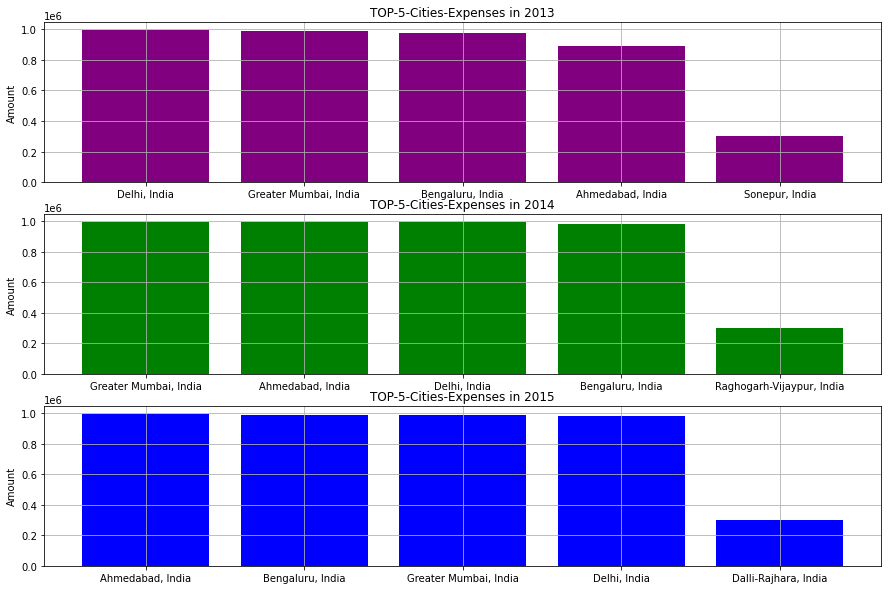

In [9]:
# Report 1. TOP-5-Cities-Expenses - graph
# Version 1 for highest daily expenses 
fig, axes = plt.subplots(3, 1, figsize=(15,10))

axes[0].grid(True)
axes[0].bar(cities_2013['City'],cities_2013['Amount'], color= 'purple')
axes[0].set_title("TOP-5-Cities-Expenses in 2013")
axes[0].set_ylabel('Amount')

axes[1].grid(True)
axes[1].bar(cities_2014['City'],cities_2014['Amount'], color= 'green')
axes[1].set_title("TOP-5-Cities-Expenses in 2014")
axes[1].set_ylabel('Amount')

axes[2].grid(True)
axes[2].bar(cities_2015['City'],cities_2015['Amount'], color= 'blue')
axes[2].set_title("TOP-5-Cities-Expenses in 2015")
axes[2].set_ylabel('Amount')

In [10]:
# Report 1. TOP-5-Cities-Expenses - table
# Version 2 for total expenses per year

Report1 = pd.DataFrame(data[['Year','City','Amount']])
cities_2013 = Report1[data.Year==2013].groupby(['Year', pd.Grouper(key='City')]).agg({'Amount':sum})
cities_2013 = cities_2013.nlargest(5,'Amount').reset_index(level=['Year','City']).set_index([pd.Index([1, 2, 3, 4, 5])])

cities_2014 = Report1[data.Year==2014].groupby(['Year', pd.Grouper(key='City')]).agg({'Amount':sum})
cities_2014 = cities_2014.nlargest(5,'Amount').reset_index(level=['Year','City']).set_index([pd.Index([1, 2, 3, 4, 5])])

cities_2015 = Report1[data.Year==2015].groupby(['Year', pd.Grouper(key='City')]).agg({'Amount':sum})
cities_2015 = cities_2015.nlargest(5,'Amount').reset_index(level=['Year','City']).set_index([pd.Index([1, 2, 3, 4, 5])])

Report1 = pd.concat([cities_2013, cities_2014, cities_2015], axis=1)
Report1

,Year,City,Amount,Year,City,Amount,Year,City,Amount
1,2013,"Bengaluru, India",84999287,2014,"Bengaluru, India",351482095,2015,"Delhi, India",145211065
2,2013,"Greater Mumbai, India",84735652,2014,"Greater Mumbai, India",349709415,2015,"Greater Mumbai, India",142306409
3,2013,"Ahmedabad, India",83291837,2014,"Ahmedabad, India",348289187,2015,"Ahmedabad, India",136213286
4,2013,"Delhi, India",82126961,2014,"Delhi, India",329591186,2015,"Bengaluru, India",135845357
5,2013,"Kanpur, India",19640338,2014,"Hyderabad, India",71066005,2015,"Kolkata, India",30918731


Text(0, 0.5, 'Amount')

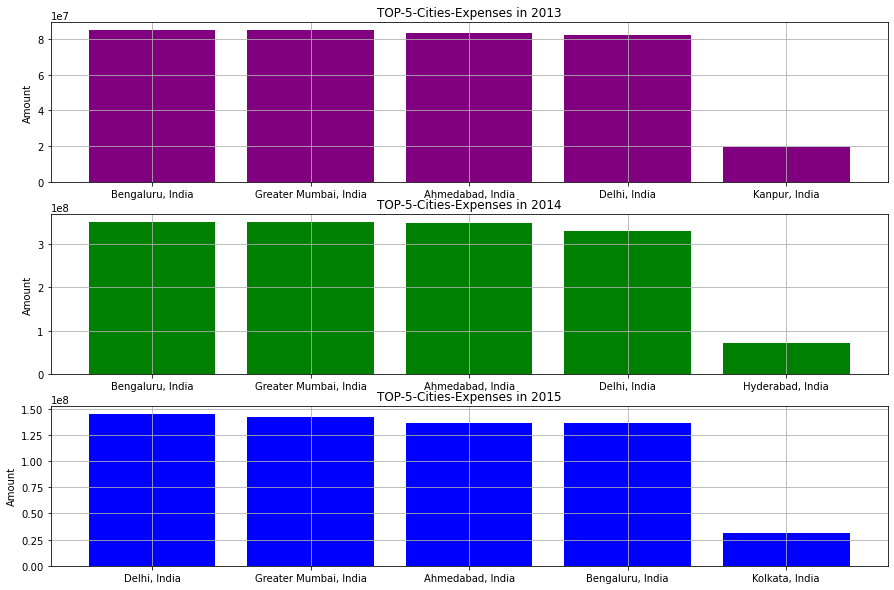

In [11]:
# Report 1. TOP-5-Cities-Expenses - graph
# Version 2 for total expenses per year
fig, axes = plt.subplots(3, 1, figsize=(15,10))

axes[0].grid(True)
axes[0].bar(cities_2013['City'],cities_2013['Amount'], color= 'purple')
axes[0].set_title("TOP-5-Cities-Expenses in 2013")
axes[0].set_ylabel('Amount')

axes[1].grid(True)
axes[1].bar(cities_2014['City'],cities_2014['Amount'], color= 'green')
axes[1].set_title("TOP-5-Cities-Expenses in 2014")
axes[1].set_ylabel('Amount')

axes[2].grid(True)
axes[2].bar(cities_2015['City'],cities_2015['Amount'], color= 'blue')
axes[2].set_title("TOP-5-Cities-Expenses in 2015")
axes[2].set_ylabel('Amount')

In [12]:
# Report 2. Gender-Expenses-Analysis - table
data['Quarter']=data['Date'].dt.quarter
Report2 = pd.DataFrame(data[['Year','Gender','Quarter','Amount']])
Report2 =Report2.groupby(['Year','Quarter','Gender']).agg({'Amount':sum})
Report2

Amount
Year Quarter Gender           
2013 4       F       333421908
             M       280221976
2014 1       F       318768288
             M       281336181
     2       F       331421060
             M       269947023
     3       F       335382914
             M       290613061
     4       F       334689993
             M       292555513
2015 1       F       344993188
             M       279678969
     2       F       206633679
             M       175169620

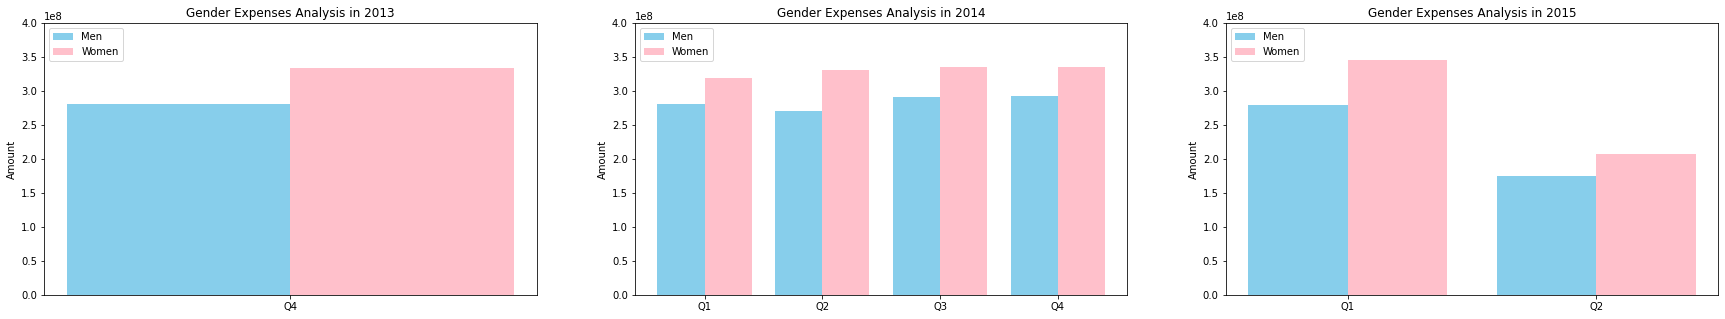

In [13]:
# Report 2. Gender-Expenses-Analysis - graph
fig, axes = plt.subplots(1, 3, figsize=(30,5))

#Set up the bar chart for 2013 data
graph_2013 = pd.DataFrame(data[['Year','Gender','Quarter','Amount']])
graph_2013 =graph_2013[data.Year==2013].groupby(['Year','Quarter','Gender']).agg({'Amount':sum}).reset_index(level=['Year','Quarter','Gender'])
labels2013 = ['Q4']
M2013 = graph_2013.loc[1::2,'Amount']
F2013 = graph_2013.loc[0::2,'Amount']
x2013 = np.arange(len(labels2013))
width = 0.1

axes[0].bar(x2013 - width/2, M2013, width, label='Men', color= 'skyblue')
axes[0].bar(x2013 + width/2, F2013, width, label='Women', color= 'pink')

axes[0].set_ylabel('Amount')
axes[0].set_title('Gender Expenses Analysis in 2013')
axes[0].set_ylim(0,400000000)
axes[0].set_xticks(x2013)
axes[0].set_xticklabels(labels2013)
axes[0].legend(loc = 'upper left')

#Set up the bar chart for 2014 data
graph_2014 = pd.DataFrame(data[['Year','Gender','Quarter','Amount']])
graph_2014 =graph_2014[data.Year==2014].groupby(['Year','Quarter','Gender']).agg({'Amount':sum}).reset_index(level=['Year','Quarter','Gender'])
labels2014 = ['Q1','Q2','Q3','Q4']
M2014 = graph_2014.loc[1::2,'Amount']
F2014 = graph_2014.loc[0::2,'Amount']
x2014 = np.arange(len(labels2014))
width = 0.4

axes[1].bar(x2014 - width/2, M2014, width, label='Men', color= 'skyblue')
axes[1].bar(x2014 + width/2, F2014, width, label='Women', color= 'pink')

axes[1].set_ylabel('Amount')
axes[1].set_title('Gender Expenses Analysis in 2014')
axes[1].set_ylim(0,400000000)
axes[1].set_xticks(x2014)
axes[1].set_xticklabels(labels2014)
axes[1].legend(loc = 'upper left')

#Set up the bar chart for 2015 data
graph_2015 = pd.DataFrame(data[['Year','Gender','Quarter','Amount']])
graph_2015 =graph_2015[data.Year==2015].groupby(['Year','Quarter','Gender']).agg({'Amount':sum}).reset_index(level=['Year','Quarter','Gender'])
labels2015 = ['Q1','Q2']
M2015 = graph_2015.loc[1::2,'Amount']
F2015 = graph_2015.loc[0::2,'Amount']
x2015 = np.arange(len(labels2015))
width = 0.4

axes[2].bar(x2015 - width/2, M2015, width, label='Men', color= 'skyblue')
axes[2].bar(x2015 + width/2, F2015, width, label='Women', color= 'pink')

axes[2].set_ylabel('Amount')
axes[2].set_title('Gender Expenses Analysis in 2015')
axes[2].set_ylim(0,400000000)
axes[2].set_xticks(x2015)
axes[2].set_xticklabels(labels2015)
axes[2].legend(loc = 'upper left')


In [14]:
# Report 3. TOP3-Expenses-Analysis - table
Report3 = pd.DataFrame(data[['Year','Exp Type','Amount']])
exptype_2013 = Report3[data.Year==2013].groupby(['Year', pd.Grouper(key='Exp Type')]).agg({'Amount':sum})
exptype_2013 = exptype_2013.nlargest(3,'Amount').reset_index(level=['Year','Exp Type']).set_index([pd.Index([1, 2, 3])])
exptype_2013 = exptype_2013.sort_values('Amount')
exptype_2014 = Report3[data.Year==2014].groupby(['Year', pd.Grouper(key='Exp Type')]).agg({'Amount':sum})
exptype_2014 = exptype_2014.nlargest(3,'Amount').reset_index(level=['Year','Exp Type']).set_index([pd.Index([1, 2, 3])])
exptype_2014 = exptype_2014.sort_values('Amount')
exptype_2015 = Report3[data.Year==2015].groupby(['Year', pd.Grouper(key='Exp Type')]).agg({'Amount':sum})
exptype_2015 = exptype_2015.nlargest(3,'Amount').reset_index(level=['Year','Exp Type']).set_index([pd.Index([1, 2, 3])])
exptype_2015 = exptype_2015.sort_values('Amount')
Report1 = pd.concat([exptype_2013, exptype_2014, exptype_2015], axis=1)
Report1

,Year,Exp Type,Amount,Year,Exp Type,Amount,Year,Exp Type,Amount
3,2013,Fuel,113938738,2014,Fuel,481697184,2015,Fuel,193499899
2,2013,Food,123284967,2014,Food,491383057,2015,Food,210055985
1,2013,Bills,136165014,2014,Bills,543741413,2015,Bills,227166046


Text(0, 0.5, 'Amount')

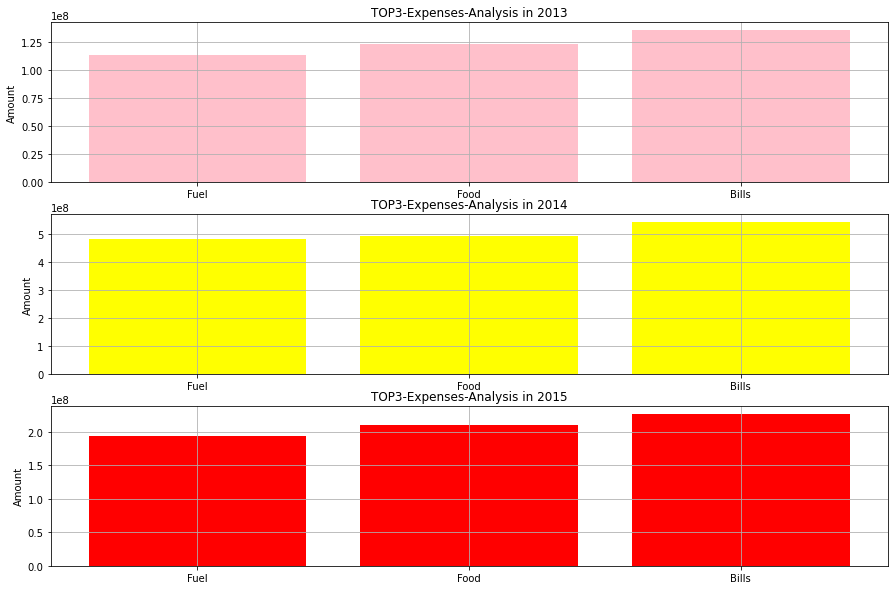

In [15]:
# Report 3. TOP3-Expenses-Analysis - graph
fig, axes = plt.subplots(3, 1, figsize=(15,10))

axes[0].grid(True)
axes[0].bar(exptype_2013['Exp Type'],exptype_2013['Amount'], color= 'pink')
axes[0].set_title("TOP3-Expenses-Analysis in 2013")
axes[0].set_ylabel('Amount')

axes[1].grid(True)
axes[1].bar(exptype_2014['Exp Type'],exptype_2014['Amount'], color= 'yellow')
axes[1].set_title("TOP3-Expenses-Analysis in 2014")
axes[1].set_ylabel('Amount')

axes[2].grid(True)
axes[2].bar(exptype_2015['Exp Type'],exptype_2015['Amount'], color= 'red')
axes[2].set_title("TOP3-Expenses-Analysis in 2015")
axes[2].set_ylabel('Amount')